In [8]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from statsmodels.tsa.stattools import grangercausalitytests

In [9]:

gdp_df = pd.read_csv('GDPR_denmark/API_NY.GDP.MKTP.KD.ZG_DS2_en_csv_v2_127.csv', skiprows=4)

# Filter for Denmark Only
gdp_df = gdp_df[gdp_df['Country Name'] == 'Denmark']

gdp_df = gdp_df.drop(columns=['Country Code', 'Indicator Name', 'Indicator Code'])

gdp_df = gdp_df.melt(id_vars=['Country Name'], var_name='Year', value_name='GDP_Growth')

# Remove Non-Numeric Year Values
gdp_df = gdp_df[gdp_df['Year'].str.isnumeric()]
gdp_df['Year'] = gdp_df['Year'].astype(int)
gdp_df = gdp_df.dropna()


In [10]:
inflation_df = pd.read_csv('Inflation_denmark/API_FP.CPI.TOTL.ZG_DS2_en_csv_v2_59.csv', skiprows=4)

# Filter for Denmark
inflation_df = inflation_df[inflation_df['Country Name'] == 'Denmark']

# Drop unnecessary columns
inflation_df = inflation_df.drop(columns=['Country Code', 'Indicator Name', 'Indicator Code'])

# Convert from wide to long format
inflation_df = inflation_df.melt(id_vars=['Country Name'], var_name='Year', value_name='Inflation')

# Ensure Year is numeric and drop NaNs
inflation_df = inflation_df[inflation_df['Year'].str.isnumeric()]
inflation_df['Year'] = inflation_df['Year'].astype(int)
inflation_df = inflation_df.dropna()

In [11]:
df = pd.merge(gdp_df, inflation_df, on=['Country Name', 'Year'])

In [12]:
df = df.drop(columns=['Country Name'])

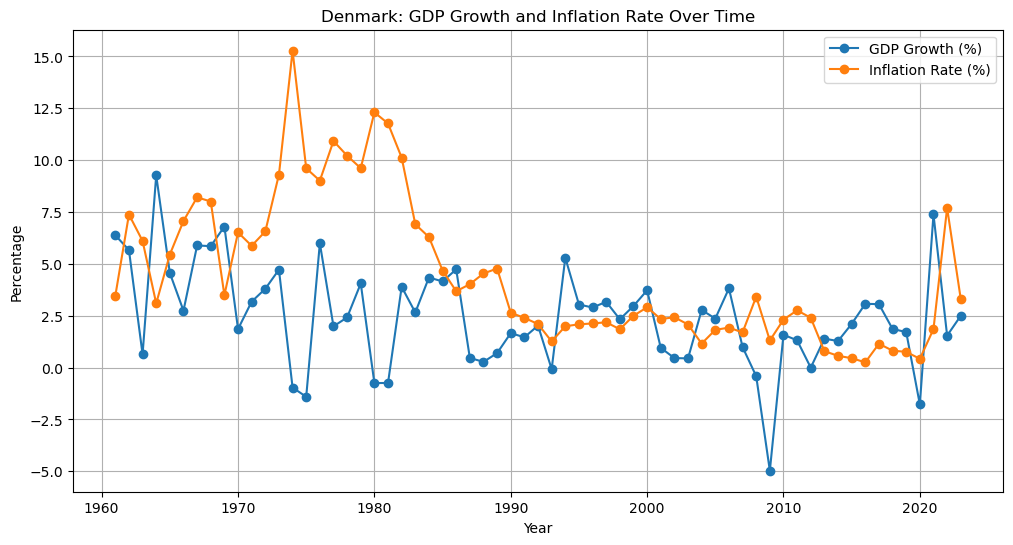

In [13]:
plt.figure(figsize=(12, 6))
plt.plot(df['Year'], df['GDP_Growth'], label='GDP Growth (%)', marker='o', linestyle='-')
plt.plot(df['Year'], df['Inflation'], label='Inflation Rate (%)', marker='o', linestyle='-')
plt.xlabel('Year')
plt.ylabel('Percentage')
plt.title('Denmark: GDP Growth and Inflation Rate Over Time')
plt.legend()
plt.grid(True)
plt.show()

In [14]:
correlation = df['GDP_Growth'].corr(df['Inflation'])
print(f'Correlation between GDP Growth and Inflation: {correlation:.2f}')

Correlation between GDP Growth and Inflation: 0.03


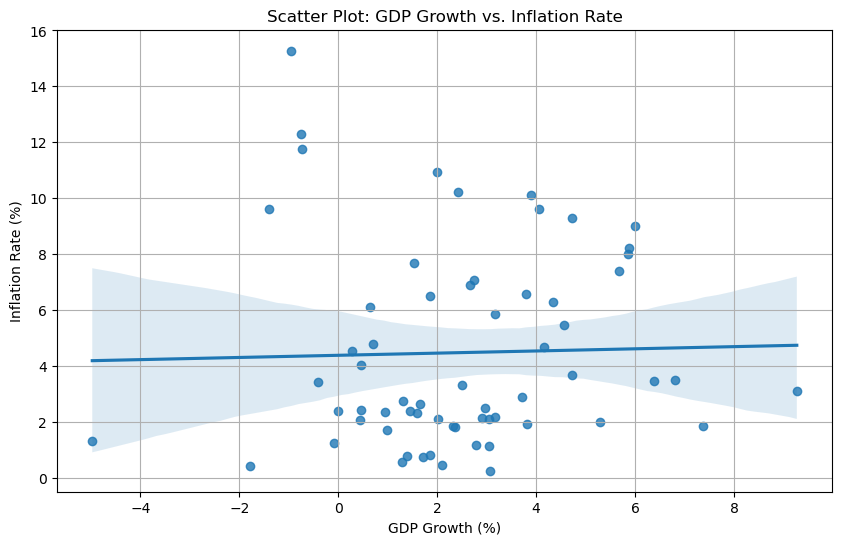

In [15]:
plt.figure(figsize=(10, 6))
sns.regplot(x='GDP_Growth', y='Inflation', data=df)
plt.xlabel('GDP Growth (%)')
plt.ylabel('Inflation Rate (%)')
plt.title('Scatter Plot: GDP Growth vs. Inflation Rate')
plt.grid(True)
plt.show()

In [16]:
granger_df = df[['Year', 'GDP_Growth', 'Inflation']].set_index('Year')

In [17]:
granger_df = granger_df.diff().dropna()
max_lag = 3
grangercausalitytests(granger_df, max_lag, verbose=True)


Granger Causality
number of lags (no zero) 1
ssr based F test:         F=13.9646 , p=0.0004  , df_denom=58, df_num=1
ssr based chi2 test:   chi2=14.6870 , p=0.0001  , df=1
likelihood ratio test: chi2=13.1597 , p=0.0003  , df=1
parameter F test:         F=13.9646 , p=0.0004  , df_denom=58, df_num=1

Granger Causality
number of lags (no zero) 2
ssr based F test:         F=5.0844  , p=0.0094  , df_denom=55, df_num=2
ssr based chi2 test:   chi2=11.0933 , p=0.0039  , df=2
likelihood ratio test: chi2=10.1789 , p=0.0062  , df=2
parameter F test:         F=5.0844  , p=0.0094  , df_denom=55, df_num=2

Granger Causality
number of lags (no zero) 3
ssr based F test:         F=2.8286  , p=0.0474  , df_denom=52, df_num=3
ssr based chi2 test:   chi2=9.6281  , p=0.0220  , df=3
likelihood ratio test: chi2=8.9187  , p=0.0304  , df=3
parameter F test:         F=2.8286  , p=0.0474  , df_denom=52, df_num=3


/Users/sergiobd373/anaconda3/lib/python3.11/site-packages/statsmodels/tsa/stattools.py:1488: FutureWarning: verbose is deprecated since functions should not print results
  warnings.warn(


{1: ({'ssr_ftest': (13.964649762963944, 0.0004277280648587043, 58.0, 1),
   'ssr_chi2test': (14.68695923346208, 0.0001269214403118187, 1),
   'lrtest': (13.15965275562553, 0.00028604188775363423, 1),
   'params_ftest': (13.964649762963935, 0.00042772806485870613, 58.0, 1.0)},
   array([[0., 1., 0.]])]),
 2: ({'ssr_ftest': (5.0844129262625435, 0.009416224638288185, 55.0, 2),
   'ssr_chi2test': (11.093264566391005, 0.0039005711681597017, 2),
   'lrtest': (10.178882295766527, 0.006161462271420017, 2),
   'params_ftest': (5.084412926262561, 0.009416224638288083, 55.0, 2.0)},
   array([[0., 0., 1., 0., 0.],
          [0., 0., 0., 1., 0.]])]),
 3: ({'ssr_ftest': (2.828598029182191, 0.04738281777270297, 52.0, 3),
   'ssr_chi2test': (9.62811252240861, 0.022006798743525346, 3),
   'lrtest': (8.91872381438111, 0.030391244625150714, 3),
   'params_ftest': (2.8285980291821917, 0.04738281777270297, 52.0, 3.0)},
   array([[0., 0., 0., 1., 0., 0., 0.],
          [0., 0., 0., 0., 1., 0., 0.],
        